In [2]:
import pandas as pd
import os

papers = pd.read_csv(
    "./rawData/sampler_10ktexts_perdecade.ALL2.tsv",
    sep='\t',
    names=["timePeriod", "index", "rawText"]
)

papers.head()

,timePeriod,index,rawText
0,180X.POS.rand,1,The_DT hon_NN ._SENT
1,180X.POS.rand,2,The_DT gallant_JJ general_NN who_WP commanded_...
2,180X.POS.rand,3,"But_CC ,_, Mr._NP Pitt_NP said_VBD ,_, he_PP d..."
3,180X.POS.rand,4,"And_CC Dr._NP Hussey_NP ,_, who_WP informs_VBZ..."
4,180X.POS.rand,5,In_IN former_JJ times_NNS and_CC in_IN former_...


In [3]:
papers['timePeriod'] = papers['timePeriod'].map(lambda x: x.rstrip('X.POS.rand'))
papers['timePeriod'] = papers['timePeriod'].astype(str) + '0'
papers.head()

,timePeriod,index,rawText
0,1800,1,The_DT hon_NN ._SENT
1,1800,2,The_DT gallant_JJ general_NN who_WP commanded_...
2,1800,3,"But_CC ,_, Mr._NP Pitt_NP said_VBD ,_, he_PP d..."
3,1800,4,"And_CC Dr._NP Hussey_NP ,_, who_WP informs_VBZ..."
4,1800,5,In_IN former_JJ times_NNS and_CC in_IN former_...


In [4]:
papers['timePeriod'] = pd.to_datetime(papers['timePeriod'], format='%Y')
papers['timePeriod'] = pd.DatetimeIndex(papers['timePeriod']) #.year
papers.head()

,timePeriod,index,rawText
0,1800-01-01,1,The_DT hon_NN ._SENT
1,1800-01-01,2,The_DT gallant_JJ general_NN who_WP commanded_...
2,1800-01-01,3,"But_CC ,_, Mr._NP Pitt_NP said_VBD ,_, he_PP d..."
3,1800-01-01,4,"And_CC Dr._NP Hussey_NP ,_, who_WP informs_VBZ..."
4,1800-01-01,5,In_IN former_JJ times_NNS and_CC in_IN former_...


In [5]:
reducedPapers = papers[papers["timePeriod"].isin(pd.date_range("1800-01-01", "1830-01-01"))]
reducedPapers.head()

,timePeriod,index,rawText
0,1800-01-01,1,The_DT hon_NN ._SENT
1,1800-01-01,2,The_DT gallant_JJ general_NN who_WP commanded_...
2,1800-01-01,3,"But_CC ,_, Mr._NP Pitt_NP said_VBD ,_, he_PP d..."
3,1800-01-01,4,"And_CC Dr._NP Hussey_NP ,_, who_WP informs_VBZ..."
4,1800-01-01,5,In_IN former_JJ times_NNS and_CC in_IN former_...


In [6]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(nltk.corpus.stopwords.words('english'))
wn = WordNetLemmatizer()

# Make a copy of the DataFrame to avoid the SettingWithCopyWarning
reducedPapers = reducedPapers.copy()

def preprocess_text(text):
    tokens = [word.split('_')[0] for word in nltk.word_tokenize(text.lower())]
    words = [word for word in tokens if word.isalpha()]
    lemmas = [wn.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(lemmas)

reducedPapers['processedText'] = reducedPapers['rawText'].apply(preprocess_text)

reducedPapers.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,timePeriod,index,rawText,processedText
0,1800-01-01,1,The_DT hon_NN ._SENT,hon
1,1800-01-01,2,The_DT gallant_JJ general_NN who_WP commanded_...,gallant general commanded well knew reinforcem...
2,1800-01-01,3,"But_CC ,_, Mr._NP Pitt_NP said_VBD ,_, he_PP d...",pitt said doubted whether would necessary inse...
3,1800-01-01,4,"And_CC Dr._NP Hussey_NP ,_, who_WP informs_VBZ...",hussey informs u romish bishop waterford appoi...
4,1800-01-01,5,In_IN former_JJ times_NNS and_CC in_IN former_...,former time former war invasion often threaten...


In [ ]:
reducedPapers.to_csv('./processedData/processedData.csv', sep=',')
reducedPapers = pd.read_csv(
    "./processedData/processedData.csv",
    sep=',',
    names=["timePeriod", "index", "rawText"]
)

reducedPapers.head(100)

In [8]:
from bertopic import BERTopic

model = BERTopic(language="english",
                       calculate_probabilities=True,
                       top_n_words=4,
                       nr_topics=50,
                       min_topic_size=50,
                       n_gram_range=(1,2),
                       verbose=True)
topics, probs = model.fit_transform(reducedPapers['processedText'])

Batches:   0%|          | 0/916 [00:00<?, ?it/s]

2023-04-06 14:34:11,785 - BERTopic - Transformed documents to Embeddings
2023-04-06 14:34:43,469 - BERTopic - Reduced dimensionality
2023-04-06 14:34:52,042 - BERTopic - Clustered reduced embeddings
2023-04-06 14:34:58,214 - BERTopic - Reduced number of topics from 53 to 50


In [9]:
model.get_topic_freq()
model.get_topic_info()

,Topic,Count,Name
0,-1,15641,-1_would_house_could_upon
1,0,2375,0_ireland_catholic_church_protestant
2,1,1536,1_hon_hon hon_right hon_right
3,2,617,2_gentleman_learned gentleman_learned_gentlema...
4,3,479,3_bank_note_circulation_fund
5,4,469,4_friend_learned friend_learned_hon friend
6,5,439,5_pergami_royal highness_highness_royal
7,6,437,6_would_house_could_hon
8,7,433,7_saw_time_nothing_day
9,8,422,8_minister_majesty_prince_majesty minister


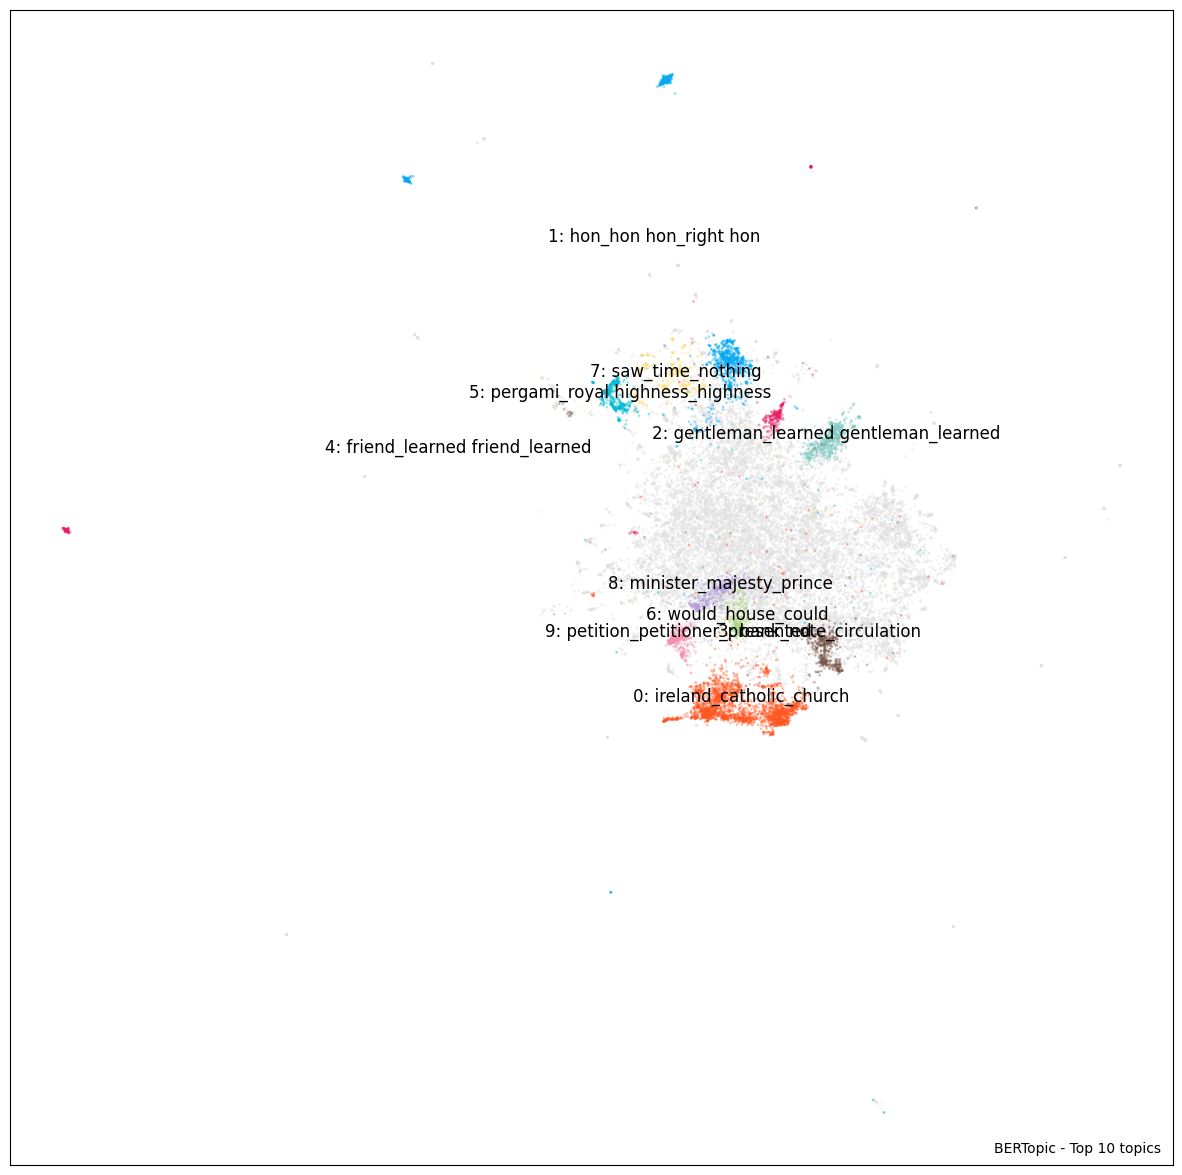

In [10]:
import numpy as np
import pandas as pd
from umap import UMAP

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Prepare data for plotting
embeddings = model._extract_embeddings(reducedPapers['processedText'] , method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit(embeddings)
df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
df["topic"] = topics

# Plot parameters
top_n = 10
fontsize = 12

# Slice data
to_plot = df.copy()
to_plot[df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

# Visualize topics
cmap = matplotlib.colors.ListedColormap(['#FF5722', # Red
                                        '#03A9F4', # Blue
                                        '#4CAF50', # Green
                                        '#80CBC4', # FFEB3B
                                        '#673AB7', # Purple
                                        '#795548', # Brown
                                        '#E91E63', # Pink
                                        '#212121', # Black
                                        '#00BCD4', # Light Blue
                                        '#CDDC39', # Yellow/Red
                                        '#AED581', # Light Green
                                        '#FFE082', # Light Orange
                                        '#BCAAA4', # Light Brown
                                        '#B39DDB', # Light Purple
                                        '#F48FB1', # Light Pink
                                        ])

# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("BERTopic_Example_Cluster_Plot.png")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Prepare data for plotting
embeddings = model._extract_embeddings(reducedPapers['processedText'], method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit(embeddings)
df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
df["topic"] = topics

# Plot parameters
top_n = 10
fontsize = 12

# Slice data
to_plot = df.copy()
to_plot[df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

# Dynamic color scale
n_topics = len(np.unique(topics))
cmap = plt.get_cmap('hsv_r', n_topics)

# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(20, 10))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.colorbar(scatter)
plt.savefig("BERTopic_Example_Cluster_Plot.png")
plt.show()
